## Explore The Data: Plot Categorical Features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Name`, `Sex`, `Ticket`, `Cabin`, and `Embarked` features.**

### Read In Data

In [1]:
# Read in our data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

titanic_df = pd.read_csv('../Data/titanic.csv', usecols=['Survived', 'Name', 'Sex', 'Cabin', 'Embarked'])
titanic_df.head()

,Survived,Name,Sex,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C
2,1,"Heikkinen, Miss. Laina",female,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S
4,0,"Allen, Mr. William Henry",male,NaN,S


### Plot Categorical Features

In [3]:
# Create a title feature by parsing passenger name and create a cabin indicator variable
# get the raw Title, then only retain the most significant Title and group the remaining as Other (based on how many survived)
titanic_df['Title_Raw'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_df['Title'] = titanic_df['Title_Raw'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Other')

# put the cabin indicator whether they have cabin or not (if /else)
titanic_df['Cabin_ind'] = np.where(titanic_df['Cabin'].isnull(), 0, 1)

titanic_df.head()

,Survived,Name,Sex,Cabin,Embarked,Title_Raw,Title,Cabin_ind
0,0,"Braund, Mr. Owen Harris",male,NaN,S,Mr,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C,Mrs,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,NaN,S,Miss,Miss,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S,Mrs,Mrs,1
4,0,"Allen, Mr. William Henry",male,NaN,S,Mr,Mr,0


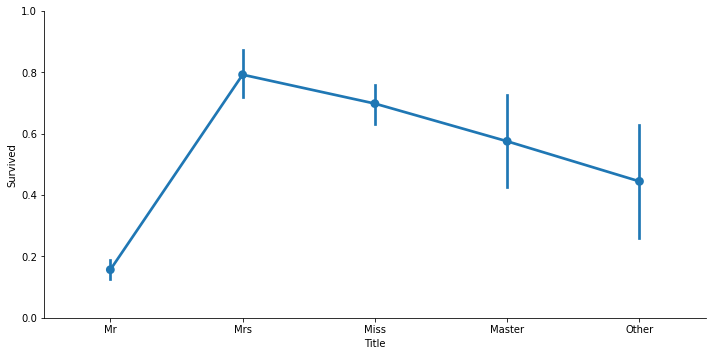

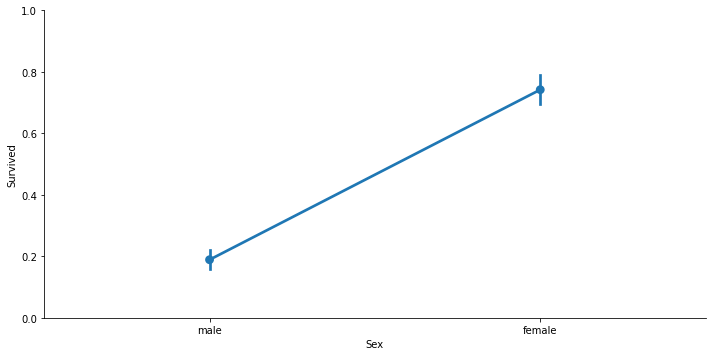

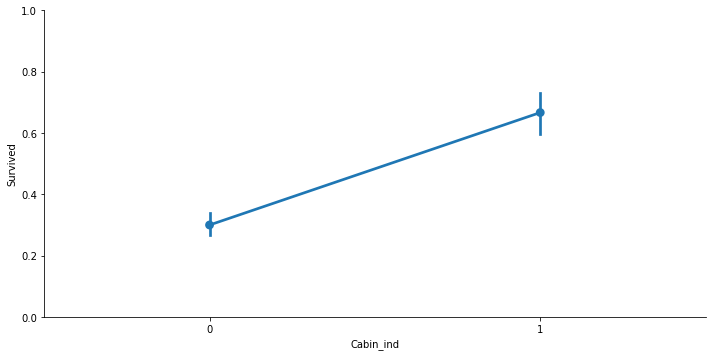

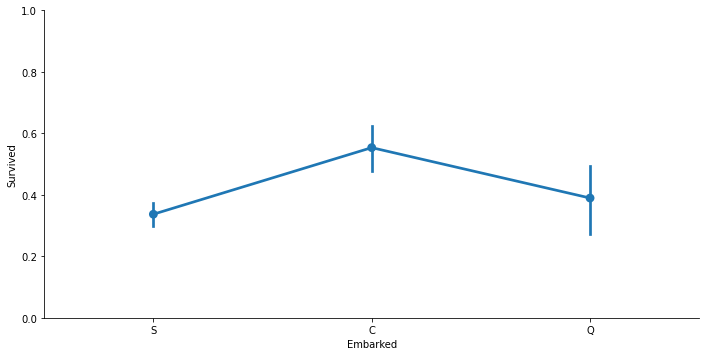

In [4]:
# Generate categorical plots for features
for col in ['Title', 'Sex', 'Cabin_ind', 'Embarked']:
    sns.catplot(x=col, y='Survived', data=titanic_df, kind='point', aspect=2)
    plt.ylim(0,1) # y axis to be between zero and one to evaluate these all on the same axis.
    
# Note
# point: percentage of survived
# vertical bar: errors

As from the above three charts,
- Mrs, Miss, Master have higher survival chance which is closely related to Gender.
- for cabin, pepople with assigned had higher survival chance.
- for 'Embarked', we can see that 'C' has a higher survival chance than who embarked in 'S' and 'Q'. But there maybe some underlying reason. so we might want to look at more details.

In [5]:
# Split embarked by whether the passenger had a cabin
titanic_df.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


We can see that people who embarked in 'S' and 'Q' had much higher proporations `Without Cabin` compared to 'C'. Given that people with cabin survived more and this might led to 'C' have a higher survival chance than other two ports.